In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from functools import reduce
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os


sns.set_style("darkgrid")

In [60]:
# us_major_tech_stk = ['V','MA','NFLX','CSCO','ADBE','MSFT','CRM','TSLA','GOOG','FB','GOOGL','TSM',
#                         'AMZN','AAPL','PYPL','INTC','NVDA','QCOM','MU','BABA']

# us_blockchain_stk = ['EBON','CAN','LFIN','CNET','AMD','FB','NVDA','XNET','SRAX','RENN','OSTK','RIOT',
#                  'GBTC','MARA','NCTY']

# us_saas_stk = ['HUBS','CDAY','ORCL','WDAY','COUP','INTU','SMAR','OKTA','ADP','PAYC','WORK','ADBE','MSFT','SPLK',
#            'ZM','RNG','CRM','SAP','GDDY','DBX','VEEV','NOW','TEAM','ZEN','ADSK',
#           'TTD','DDOG','TWLO','SHOP','DOCU','SQ','CRWD']

# us_biotech_stk = ['AHPI','INO','IBIO','MRNA','VIR','NNVC','GILD','AZN','PFE','JNJ','BNTX','ABT','CBLI','ARPO','VCNX','HTBX','NVAX',
#                  'VXRT','CRVS','APT','CODX','EQ','ACOR','LAKE','AEMD','DFFN']

# us_new_energy_stk = ['TSLA','NIO','LI','XPEV','SQM','ALB','LTHM','FMC','LAC']

# major_etf = ["SPY",
#              "QQQ",
#              "VXX",
#              "DBA",#综合型商品ETF
#              "DBC",#
#              "IEF",#
#              "TLT",#
#              "GLD",#
#              "GDX",#
#              "UUP",#美元
#              "FXE",#欧元
#              "FXF",#瑞郎
#              "FXY",#日元
#              "FXB",#英镑
#              "CYB"#人民币
#             ]
# us_sector_etf = ['XLE',#能源
#                  'XLV',#金融
#                  'XLI',#医疗
#                  'XLF',#工业
#                  'XLY',#原材料
#                  'XLP',#必选消费
#                  'XLB',#原材料
#                  'XLK',#科技
#                  'XLU',#公共事业
#                  'XLRE'#房地产
#                 ]

# target_sector_etf = ['ARKG',
#                     'ARKK',
#                     'ARKF']

# all_tickers = list(set(us_major_tech_stk + \
#               us_blockchain_stk + \
#               us_saas_stk + \
#               us_biotech_stk + \
#               us_new_energy_stk + \
#               major_etf + \
#               us_sector_etf + \
#               target_sector_etf))

# def today_dt():
#     today = str(datetime.now().date())
#     return today

# def download_yf_data(start, end, us_db_path, ticker_list):
#     for ticker in ticker_list:
#     #     print("testing")
#         # Initial downloading:
#         if not os.path.exists(us_db_path+ticker+".csv"):
#             print("{} is new, start downloading now...".format(ticker))
# #             with eventlet.Timeout(60,False):
#             try:
#                 data = yf.download(ticker, start=start, end=end)
#                 data.reset_index(inplace = True)
#                 data['Ticker'] = ticker
#                 data.to_csv(us_db_path+ticker+".csv", index = False)
#                 print("{} data file created: {}".format(ticker, end))
#             except Exception as e:
#                 print(e)

#         else:
#             print("Already have data csv for {}".format(ticker))
#             hist_data = pd.read_csv(us_db_path+ticker+".csv")
#             try:
#                 hist_data_first_date = hist_data['Date'].values[0]
#                 if start >= hist_data_first_date:
#                     hist_data_last_date = hist_data['Date'].values[-1]
#                     if today > hist_data_last_date:
#                         print("Needs to update, start updating new data for {} now...".format(ticker))
#                         update_start = hist_data_last_date
#                         update_end = today
# #                         with eventlet.Timeout(60,False):
#                         try:
#                             new_data = yf.download(ticker, start=update_start, end=update_end)
#                             new_data.reset_index(inplace = True)
#                             new_data['Ticker'] = ticker
#                             new_data.to_csv(us_db_path+ticker+".csv", mode='a', header=False, index = False)
#                             updated_duplicated_df = pd.read_csv(us_db_path+ticker+".csv")
#                             updated_df = updated_duplicated_df.drop_duplicates("Date")
#                             updated_df.sort_values("Date", inplace = True)
#                             updated_df.to_csv(us_db_path+ticker+".csv", index = False)
#                             print("New data updated till today for {}!".format(ticker))
#                         except Exception as e:
#                             print(e)
#             #             print("Timed Out: Update Failed!")
#                     else:
#                         print("There's no new data to update for {}.".format(ticker))

#                 else:
#                     print("Setup start date earlier than existing data's, trying to pull data from before...")
#                     hist_data_last_date = hist_data['Date'].values[-1]
#                     if today > hist_data_last_date:
#                         print("Needs to update, start updating new data for {} now...".format(ticker))
#                         update_start = start
#                         update_end = today
# #                         with eventlet.Timeout(60,False):
#                         try:
#                             new_data = yf.download(ticker, start=update_start, end=update_end)
#                             new_data.reset_index(inplace = True)
#                             new_date = new_data['Date'].values[0]
#                             print("New data's first pulled date is {}".format(new_date))
#                             new_data['Ticker'] = ticker

#                             new_data.to_csv(us_db_path+ticker+".csv", mode='a', header=False, index = False)
#                             updated_duplicated_df = pd.read_csv(us_db_path+ticker+".csv")
#                             updated_df = updated_duplicated_df.drop_duplicates("Date")
#                             updated_df.sort_values("Date", inplace = True)
#                             updated_df.to_csv(us_db_path+ticker+".csv", index = False)
#                             print("New data updated till today for {}!".format(ticker))
#                         except Exception as e:
#                             print(e)
#                     else:
#                         print("There's no new data to update for {}.".format(ticker))
#             except Exception as e:
#                 print(e)

#     #     print("Data Download/Update for {} is Finished.".format(ticker))
#         print("===============================================")
#     print("【Updated Finished for today!】")


# start = "2005-01-01"
# today = today_dt()
# end = today
# us_db_path = "./US_Data/"

# download_yf_data(start, end, us_db_path, all_tickers)

In [2]:
all_csvs = "./US_Data/*.csv"
stock_list = []
len_ = 0
date_col = "Date"
price_col = "Close"
for fname in glob.glob(all_csvs)[:]:
#     print (fname)
    stock = pd.read_csv(fname)
    stock = stock.sort_values(date_col)
    stock = stock[[date_col,price_col]]
    stock['pct_chg'] = stock[price_col].pct_change()
    ticker = fname[10:-4]
    stock.columns = [date_col, price_col, ticker]
    stock = stock[[date_col, ticker]].dropna()
    stock[date_col] = pd.to_datetime(stock[date_col])
#     stock.set_index('date', inplace=True)
    stock_list.append(stock)
    print ("Length of {}: {}".format(ticker, len(stock)))
    len_ = len_+len(stock)
    print ("Total length:{}".format(len_))
    print ("===========")

def merge_df(df1, df2):
    df1.sort_values(date_col, inplace = True)
    merged = df1.merge(df2, on = date_col, how = 'outer')
    merged.sort_values(date_col, inplace = True)
    return merged

merged_all = reduce(merge_df, stock_list)
merged_all.set_index(date_col, inplace=True)

Length of AAPL: 4042
Total length:4042
Length of ABT: 4042
Total length:8084
Length of ACOR: 3762
Total length:11846
Length of ADBE: 4042
Total length:15888
Length of ADP: 4042
Total length:19930
Length of ADSK: 4042
Total length:23972
Length of AEMD: 4042
Total length:28014
Length of AHPI: 4042
Total length:32056
Length of ALB: 4042
Total length:36098
Length of AMD: 4042
Total length:40140
Length of AMZN: 4042
Total length:44182
Length of APT: 4042
Total length:48224
Length of ARKF: 496
Total length:48720
Length of ARKG: 269
Total length:48989
Length of ARKK: 1566
Total length:50555
Length of ARPO: 737
Total length:51292
Length of AZN: 4042
Total length:55334
Length of BABA: 1596
Total length:56930
Length of BNTX: 323
Total length:57253
Length of CAN: 294
Total length:57547
Length of CBLI: 3649
Total length:61196
Length of CDAY: 690
Total length:61886
Length of CNET: 2879
Total length:64765
Length of CODX: 889
Total length:65654
Length of COUP: 1080
Total length:66734
Length of CRM: 4

In [44]:
def stock_list_to_calculate_corr(all_csvs, date_col, price_col, ticker_col):
    """
    all_csvs = "C:/Users/Administrator/CE_github_2/data_pipeline/Data/*.csv"
    stock_list = []
    len_ = 0
    date_col = "Date"
    price_col = "Close"
    """
    len_ = 0
    
    for fname in glob.glob(all_csvs)[:]:
#     print (fname)
        try:
            stock = pd.read_csv(fname)
            stock = stock.sort_values(date_col)
            ticker = stock[ticker_col].values[-1]
            print(ticker)
            stock = stock[[date_col,price_col]]
            stock['pct_chg'] = stock[price_col].pct_change()
            stock.columns = [date_col, price_col, ticker]
            stock = stock[[date_col, ticker]].dropna()
            stock[date_col] = pd.to_datetime(stock[date_col])
        #     stock.set_index('date', inplace=True)
            stock_list.append(stock)
            print ("Length of {}: {}".format(ticker, len(stock)))
            len_ = len_+len(stock)
            print ("Total length:{}".format(len_))
            print ("===========")
        except:
            print("Error on: {}".format(fname))
    return stock_list

def merge_df(df1, df2):
    df1.sort_values(date_col, inplace = True)
    merged = df1.merge(df2, on = date_col, how = 'outer')
    merged.sort_values(date_col, inplace = True)
    return merged

def plot_heatmap_corrleation(data, stock_list):
    sns.heatmap(data[stock_list].corr(), annot=True, cmap = 'Blues', vmax = 1.0, vmin = -1.0)
    plt.xlabel('stocks')
    plt.ylabel('stocks')
    plt.show()

In [52]:
all_csvs = "C:/Users/Administrator/CE_github_2/data_pipeline/Data/*.csv"
date_col = "Date"
price_col = "Adj Close"
ticker_col = "Ticker"
stock_list = []
stock_list = stock_list_to_calculate_corr(all_csvs, date_col, price_col, ticker_col)
merged_all = reduce(merge_df, stock_list)
merged_all.set_index(date_col, inplace=True)

000001.SS
Length of 000001.SS: 3920
Total length:3920
0005.HK
Length of 0005.HK: 3981
Total length:7901
0008.HK
Length of 0008.HK: 3948
Total length:11849
0142.HK
Length of 0142.HK: 3974
Total length:15823
0151.HK
Length of 0151.HK: 3184
Total length:19007
0175.HK
Length of 0175.HK: 3792
Total length:22799
0186.HK
Length of 0186.HK: 3977
Total length:26776
0215.HK
Length of 0215.HK: 3977
Total length:30753
0241.HK
Length of 0241.HK: 3964
Total length:34717
0268.HK
Length of 0268.HK: 3798
Total length:38515
0285.HK
Length of 0285.HK: 3246
Total length:41761
0302.HK
Length of 0302.HK: 328
Total length:42089
0303.HK
Length of 0303.HK: 3979
Total length:46068
0315.HK
Length of 0315.HK: 3975
Total length:50043
0418.HK
Length of 0418.HK: 3973
Total length:54016
0419.HK
Length of 0419.HK: 3938
Total length:57954
0439.HK
Length of 0439.HK: 3349
Total length:61303
0493.HK
Length of 0493.HK: 3981
Total length:65284
0522.HK
Length of 0522.HK: 3981
Total length:69265
0552.HK
Length of 0552.HK: 350

Length of GLD: 4067
Total length:350559
GOOG
Length of GOOG: 4067
Total length:354626
GOOGL
Length of GOOGL: 4067
Total length:358693
HTBX
Length of HTBX: 1913
Total length:360606
HUBS
Length of HUBS: 1607
Total length:362213
IBIO
Length of IBIO: 3153
Total length:365366
IEF
Length of IEF: 4067
Total length:369433
INO
Length of INO: 4067
Total length:373500
INTC
Length of INTC: 4067
Total length:377567
INTU
Length of INTU: 4067
Total length:381634
JNJ
Length of JNJ: 4067
Total length:385701
LAC
Length of LAC: 3132
Total length:388833
LAKE
Length of LAKE: 4067
Total length:392900
LAZR
Length of LAZR: 487
Total length:393387
LFIN
Length of LFIN: 807
Total length:394194
LI
Length of LI: 146
Total length:394340
LTHM
Length of LTHM: 598
Total length:394938
MA
Length of MA: 3715
Total length:398653
MARA
Length of MARA: 2218
Total length:400871
MRNA
Length of MRNA: 559
Total length:401430
MSFT
Length of MSFT: 4067
Total length:405497
MU
Length of MU: 4067
Total length:409564
NCTY
Length of NC

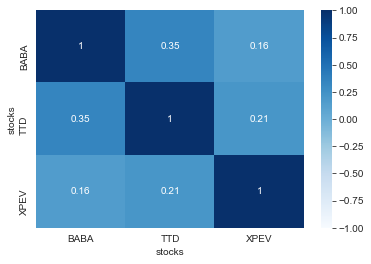

In [53]:
plot_heatmap_corrleation(merged_all, ['BABA', 'TTD', 'XPEV'])

In [48]:
corr_matrix = merged_all[['BABA', 'TTD', 'XPEV']].corr()
each_corr_mean = corr_matrix[corr_matrix!=1].mean()

In [49]:
each_corr_mean

BABA    0.255726
TTD     0.280253
XPEV    0.186964
dtype: float64

In [50]:
# How to measure/quantify a portfolio's concentration risk - Method A:
each_corr_mean.median()

0.25572563117656893

In [51]:
# How to measure/quantify a portfolio's concentration risk - Method B:
each_corr_mean.mean()

0.24098074248798443